In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

In [2]:
dfTrain = pd.read_csv('train.csv.zip')
dfTest = pd.read_csv('train.csv.zip')

In [3]:
df = pd.concat([dfTrain,dfTest])
df.reset_index(inplace=True)
df.drop('index',inplace=True,axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14704 entries, 0 to 14703
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 63.2+ MB


In [5]:
print("Number of Data Points: ", df.shape[0])
print("Number of Fatures    : ", df.shape[1])

Number of Data Points:  14704
Number of Fatures    :  563


In [6]:
print(df.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [7]:
y = df['Activity'].copy()
X = df.drop('Activity',inplace = False, axis = 1)

In [8]:
columnNames = list()
columnNames = df.columns
columnNames

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [9]:
list(columnNames)

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [10]:
badChars = ['-', '()','(',')', ',']

In [11]:
newColumnNames = []
for colName in columnNames:
  newColumnName = ''.join(i for i in colName if i not in badChars)
  newColumnNames.append(newColumnName)

In [12]:
newColumnNames

['tBodyAccmeanX',
 'tBodyAccmeanY',
 'tBodyAccmeanZ',
 'tBodyAccstdX',
 'tBodyAccstdY',
 'tBodyAccstdZ',
 'tBodyAccmadX',
 'tBodyAccmadY',
 'tBodyAccmadZ',
 'tBodyAccmaxX',
 'tBodyAccmaxY',
 'tBodyAccmaxZ',
 'tBodyAccminX',
 'tBodyAccminY',
 'tBodyAccminZ',
 'tBodyAccsma',
 'tBodyAccenergyX',
 'tBodyAccenergyY',
 'tBodyAccenergyZ',
 'tBodyAcciqrX',
 'tBodyAcciqrY',
 'tBodyAcciqrZ',
 'tBodyAccentropyX',
 'tBodyAccentropyY',
 'tBodyAccentropyZ',
 'tBodyAccarCoeffX1',
 'tBodyAccarCoeffX2',
 'tBodyAccarCoeffX3',
 'tBodyAccarCoeffX4',
 'tBodyAccarCoeffY1',
 'tBodyAccarCoeffY2',
 'tBodyAccarCoeffY3',
 'tBodyAccarCoeffY4',
 'tBodyAccarCoeffZ1',
 'tBodyAccarCoeffZ2',
 'tBodyAccarCoeffZ3',
 'tBodyAccarCoeffZ4',
 'tBodyAcccorrelationXY',
 'tBodyAcccorrelationXZ',
 'tBodyAcccorrelationYZ',
 'tGravityAccmeanX',
 'tGravityAccmeanY',
 'tGravityAccmeanZ',
 'tGravityAccstdX',
 'tGravityAccstdY',
 'tGravityAccstdZ',
 'tGravityAccmadX',
 'tGravityAccmadY',
 'tGravityAccmadZ',
 'tGravityAccmaxX',
 'tGrav

In [13]:
df.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  subject  \
0             -0.841247              0.179941             -0.058627        1   
1             -0.844788              0.180289             -0.054317        1   
2             -0.848933              0.180637             -0.049118        1   
3             -0.848649              0.181935             -0.047663        1   
4             -0.847865              0.185151             -0.043892        1   

   Activity  
0  STANDING  
1  STANDING  
2  STANDING  
3  STANDING  
4  STANDING  

[5 rows x 563 columns]

In [14]:
df.columns = newColumnNames

In [15]:
df.head()

tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0       0.288585      -0.020294      -0.132905     -0.995279     -0.983111   
1       0.278419      -0.016411      -0.123520     -0.998245     -0.975300   
2       0.279653      -0.019467      -0.113462     -0.995380     -0.967187   
3       0.279174      -0.026201      -0.123283     -0.996091     -0.983403   
4       0.276629      -0.016570      -0.115362     -0.998139     -0.980817   

   tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  tBodyAccmaxX  ...  \
0     -0.913526     -0.995112     -0.983185     -0.923527     -0.934724  ...   
1     -0.960322     -0.998807     -0.974914     -0.957686     -0.943068  ...   
2     -0.978944     -0.996520     -0.963668     -0.977469     -0.938692  ...   
3     -0.990675     -0.997099     -0.982750     -0.989302     -0.938692  ...   
4     -0.990482     -0.998321     -0.979672     -0.990441     -0.942469  ...   

   fBodyBodyGyroJerkMagkurtosis  angletBodyAccMeangravity  \
0                     -0.710304                 -0.112754   
1                     -0.861499                  0.053477   
2                     -0.760104                 -0.118559   
3                     -0.482845                 -0.036788   
4                     -0.699205                  0.123320   

   angletBodyAccJerkMeangravityMean  angletBodyGyroMeangravityMean  \
0                          0.030400                      -0.464761   
1                         -0.007435                      -0.732626   
2                          0.177899                       0.100699   
3                         -0.012892                       0.640011   
4                          0.122542                       0.693578   

   angletBodyGyroJerkMeangravityMean  angleXgravityMean  angleYgravityMean  \
0                          -0.018446          -0.841247           0.179941   
1                           0.703511          -0.844788           0.180289   
2                           0.808529          -0.848933           0.180637   
3                          -0.485366          -0.848649           0.181935   
4                          -0.615971          -0.847865           0.185151   

   angleZgravityMean  subject  Activity  
0          -0.058627        1  STANDING  
1          -0.054317        1  STANDING  
2          -0.049118        1  STANDING  
3          -0.047663        1  STANDING  
4          -0.043892        1  STANDING  

[5 rows x 563 columns]

In [16]:
df.isnull().sum()

tBodyAccmeanX        0
tBodyAccmeanY        0
tBodyAccmeanZ        0
tBodyAccstdX         0
tBodyAccstdY         0
                    ..
angleXgravityMean    0
angleYgravityMean    0
angleZgravityMean    0
subject              0
Activity             0
Length: 563, dtype: int64

In [17]:
df.isnull().any().sum()

0

<AxesSubplot:>

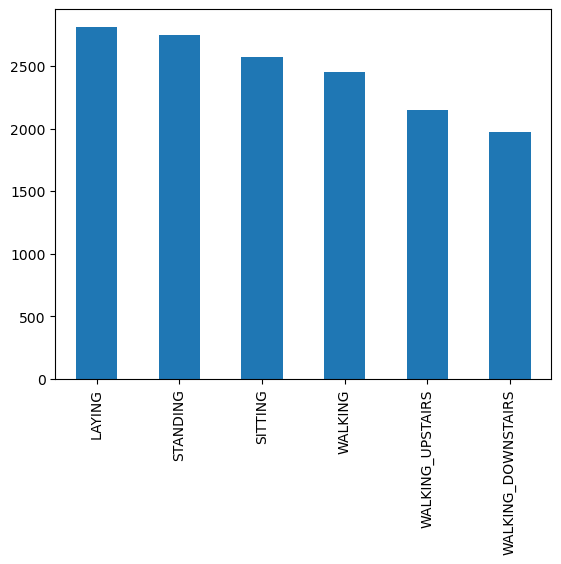

In [18]:
df.Activity.value_counts().plot.bar()

In [19]:
%time
df.groupby('Activity').mean()

Wall time: 0 ns


tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  \
Activity                                                                        
LAYING                   0.269191      -0.018345      -0.107169     -0.959475   
SITTING                  0.273449      -0.012143      -0.106581     -0.983450   
STANDING                 0.279294      -0.016123      -0.107330     -0.985346   
WALKING                  0.276260      -0.017768      -0.108884     -0.312641   
WALKING_DOWNSTAIRS       0.288169      -0.016370      -0.105860      0.139847   
WALKING_UPSTAIRS         0.261930      -0.026647      -0.120424     -0.221072   

                    tBodyAccstdY  tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  \
Activity                                                                     
LAYING                 -0.937609     -0.941635     -0.961890     -0.937975   
SITTING                -0.936208     -0.939274     -0.985281     -0.936243   
STANDING               -0.936013     -0.942360     -0.987893     -0.937355   
WALKING                -0.020272     -0.246279     -0.350317     -0.054420   
WALKING_DOWNSTAIRS      0.079184     -0.168368      0.073157      0.023240   
WALKING_UPSTAIRS       -0.000348     -0.140364     -0.279919     -0.017106   

                    tBodyAccmadZ  tBodyAccmaxX  ...  \
Activity                                        ...   
LAYING                 -0.940378     -0.910430  ...   
SITTING                -0.936903     -0.926620  ...   
STANDING               -0.940217     -0.922753  ...   
WALKING                -0.249564     -0.105249  ...   
WALKING_DOWNSTAIRS     -0.190944      0.442294  ...   
WALKING_UPSTAIRS       -0.132670     -0.010971  ...   

                    fBodyBodyGyroJerkMagskewness  \
Activity                                           
LAYING                                 -0.351786   
SITTING                                -0.385864   
STANDING                               -0.349988   
WALKING                                -0.063395   
WALKING_DOWNSTAIRS                     -0.322907   
WALKING_UPSTAIRS                       -0.362492   

                    fBodyBodyGyroJerkMagkurtosis  angletBodyAccMeangravity  \
Activity                                                                     
LAYING                                 -0.665467                  0.013707   
SITTING                                -0.687800                  0.012162   
STANDING                               -0.658387                  0.006748   
WALKING                                -0.395762                  0.021051   
WALKING_DOWNSTAIRS                     -0.665817                 -0.038708   
WALKING_UPSTAIRS                       -0.680349                  0.029824   

                    angletBodyAccJerkMeangravityMean  \
Activity                                               
LAYING                                      0.020597   
SITTING                                     0.002159   
STANDING                                    0.010516   
WALKING                                    -0.011916   
WALKING_DOWNSTAIRS                         -0.021818   
WALKING_UPSTAIRS                            0.005581   

                    angletBodyGyroMeangravityMean  \
Activity                                            
LAYING                                   0.015828   
SITTING                                  0.016712   
STANDING                                 0.002024   
WALKING                                  0.003175   
WALKING_DOWNSTAIRS                       0.184764   
WALKING_UPSTAIRS                        -0.156998   

                    angletBodyGyroJerkMeangravityMean  angleXgravityMean  \
Activity                                                                   
LAYING                                       0.010291           0.517116   
SITTING                                     -0.027970          -0.690818   
STANDING                                     0.012784          -0.773795   
WALKING  

In [20]:
%time
df.groupby('Activity').mean()['tBodyAccmeanX']

Wall time: 0 ns


Activity
LAYING                0.269191
SITTING               0.273449
STANDING              0.279294
WALKING               0.276260
WALKING_DOWNSTAIRS    0.288169
WALKING_UPSTAIRS      0.261930
Name: tBodyAccmeanX, dtype: float64

In [21]:
%time
df.groupby('Activity').mean()['tBodyAccstdX']

Wall time: 0 ns


Activity
LAYING               -0.959475
SITTING              -0.983450
STANDING             -0.985346
WALKING              -0.312641
WALKING_DOWNSTAIRS    0.139847
WALKING_UPSTAIRS     -0.221072
Name: tBodyAccstdX, dtype: float64

In [22]:
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  7352


In [23]:
df.drop_duplicates(inplace=True)

In [24]:
num_duplicates = df.duplicated().sum()
print('Number of duplicates:', num_duplicates)

Number of duplicates: 0


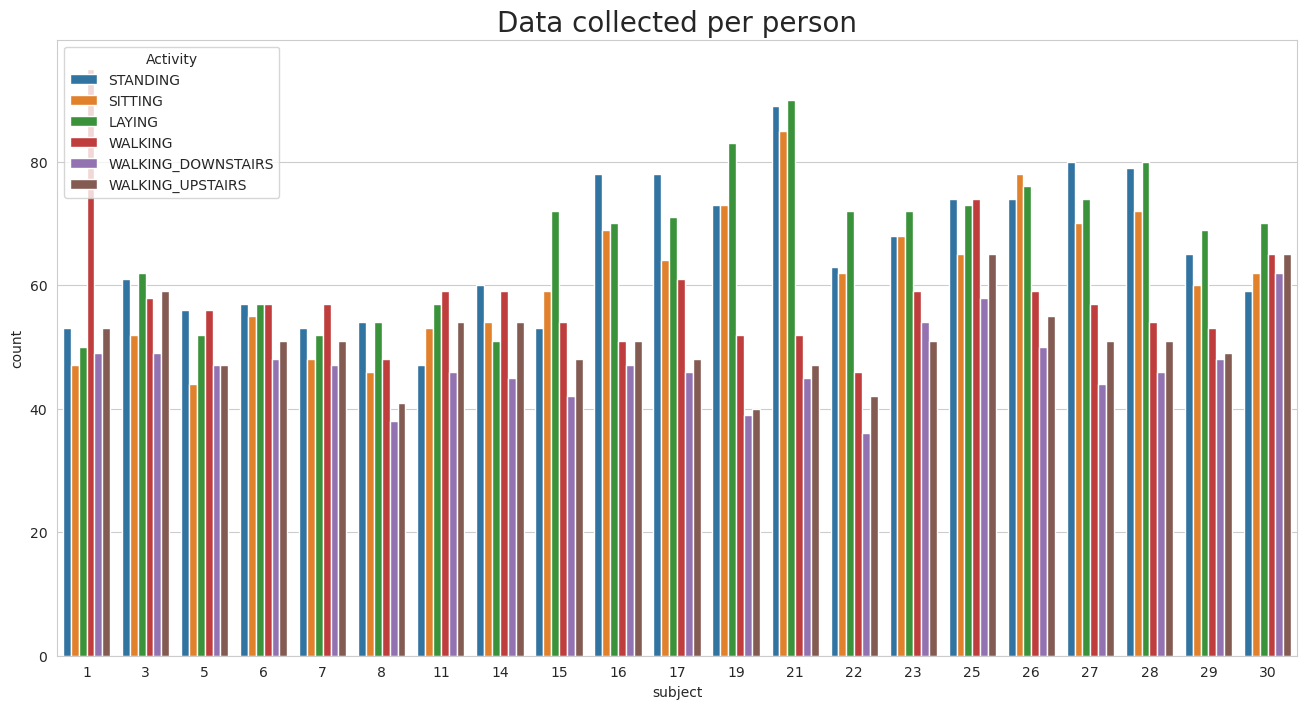

In [25]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Data collected per person', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = df)
plt.show()

C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributi

Text(0.0, 5, 'Moving Activities')

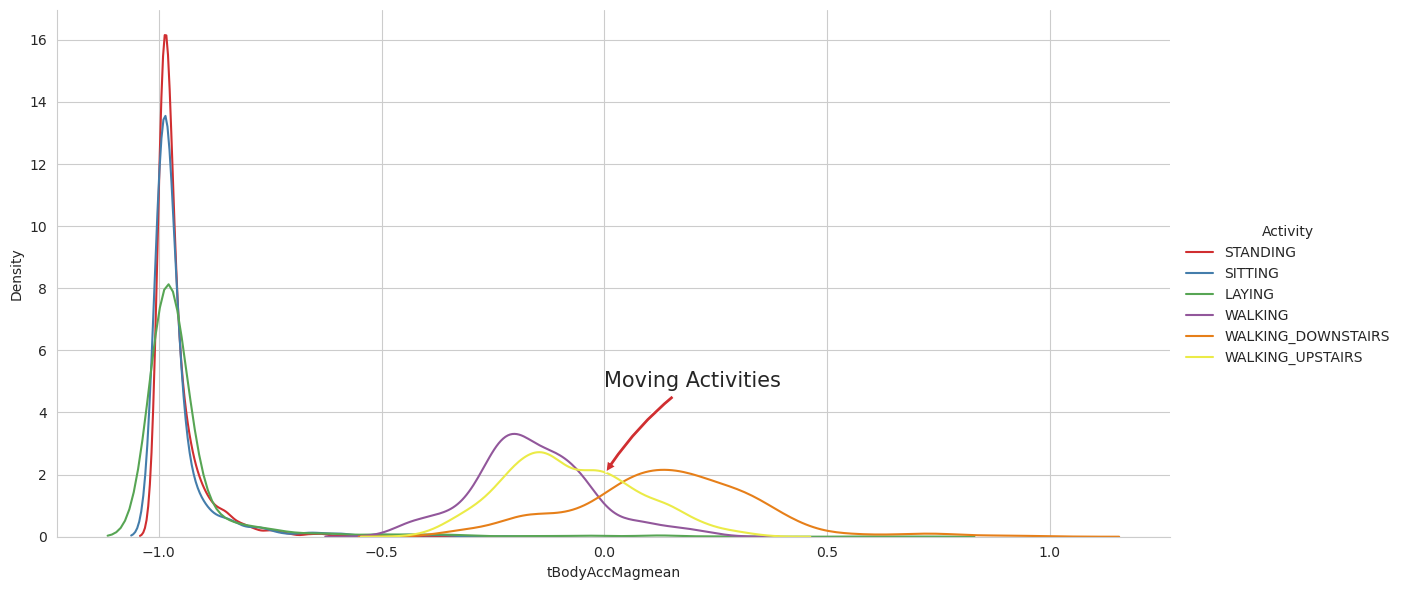

In [26]:
sns.set_palette("Set1", desat=0.8)
facetgrid = sns.FacetGrid(df,hue='Activity',size = 6, aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean',hist = False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy = (0.0,2), xytext = (0.0,5),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributi

Text(0.0, 5, 'Moving Activities')

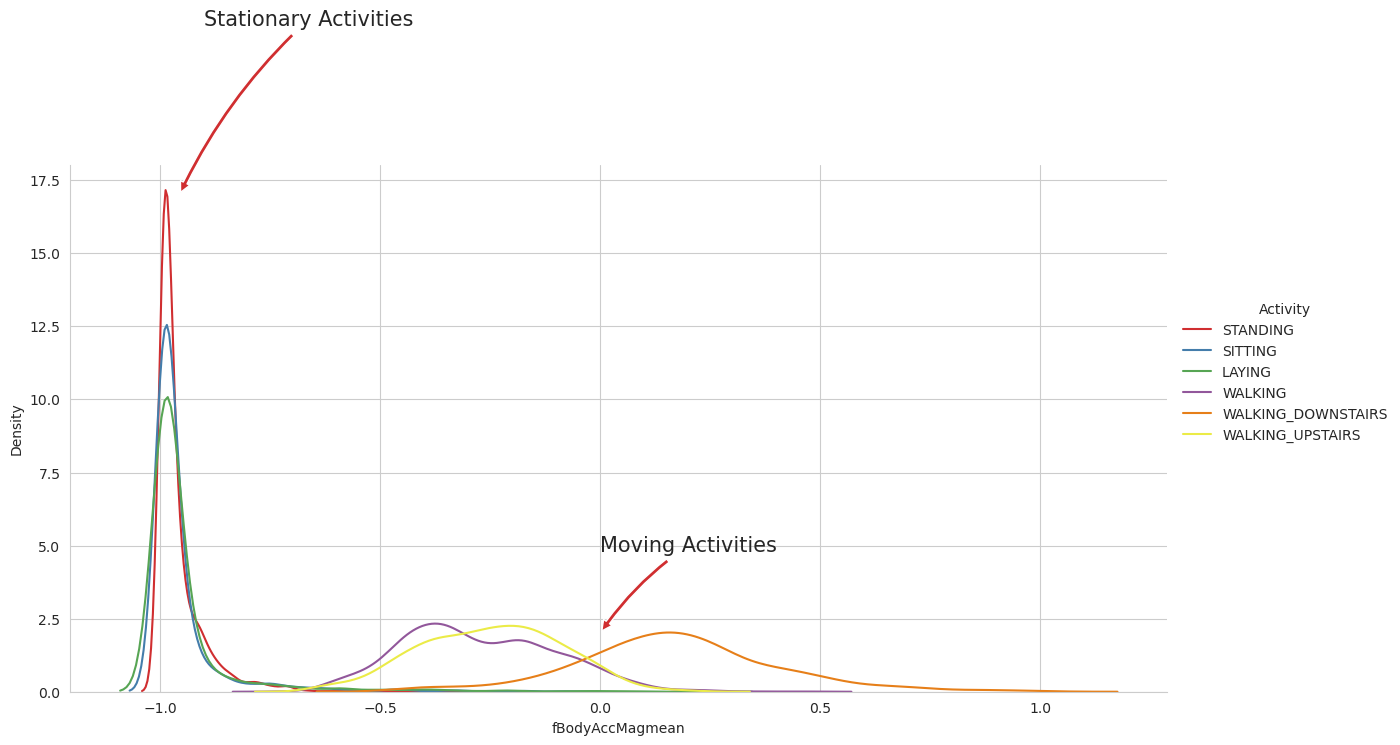

In [27]:
sns.set_palette("Set1", desat=0.8)
facetgrid = sns.FacetGrid(df,hue='Activity',size = 6, aspect=2)
facetgrid.map(sns.distplot,'fBodyAccMagmean',hist = False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy = (0.0,2), xytext = (0.0,5),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributi

Text(0.0, 5, 'Moving Activities')

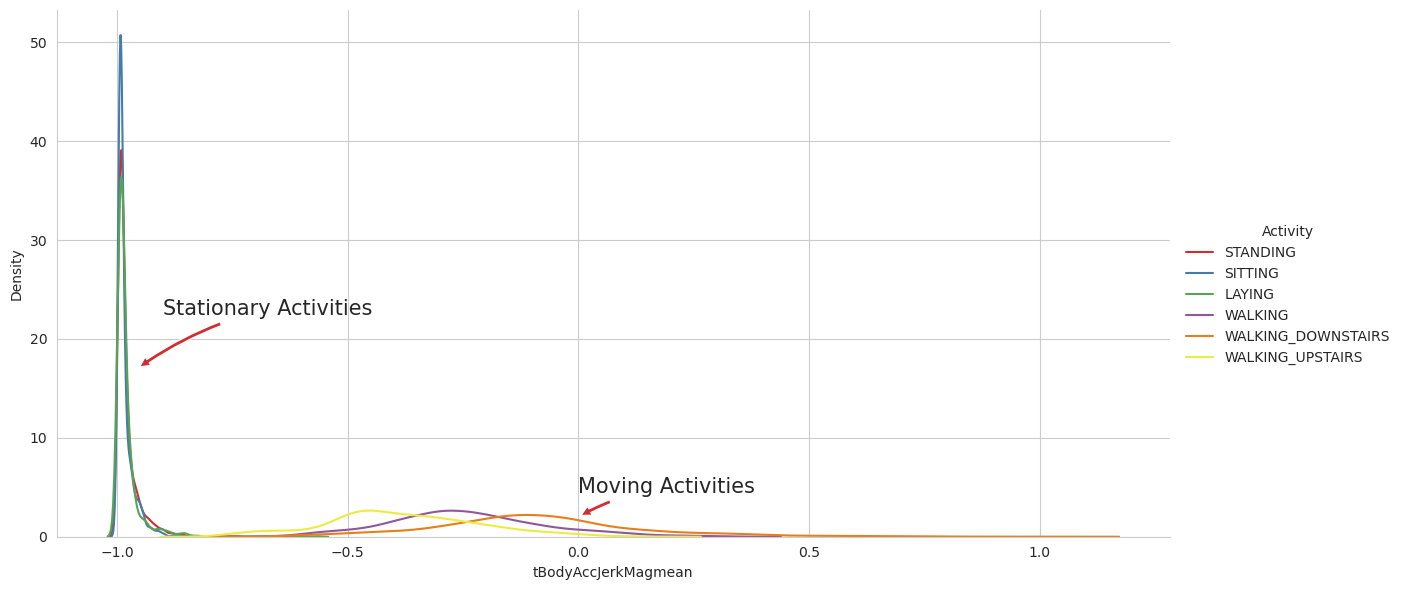

In [28]:
sns.set_palette("Set1", desat=0.8)
facetgrid = sns.FacetGrid(df,hue='Activity',size = 6, aspect=2)
facetgrid.map(sns.distplot,'tBodyAccJerkMagmean',hist = False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy = (0.0,2), xytext = (0.0,5),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

In [29]:
df['tBodyAccJerkMagmean'].max()

1.0

C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributi

Text(0.0, 5, 'Moving Activities')

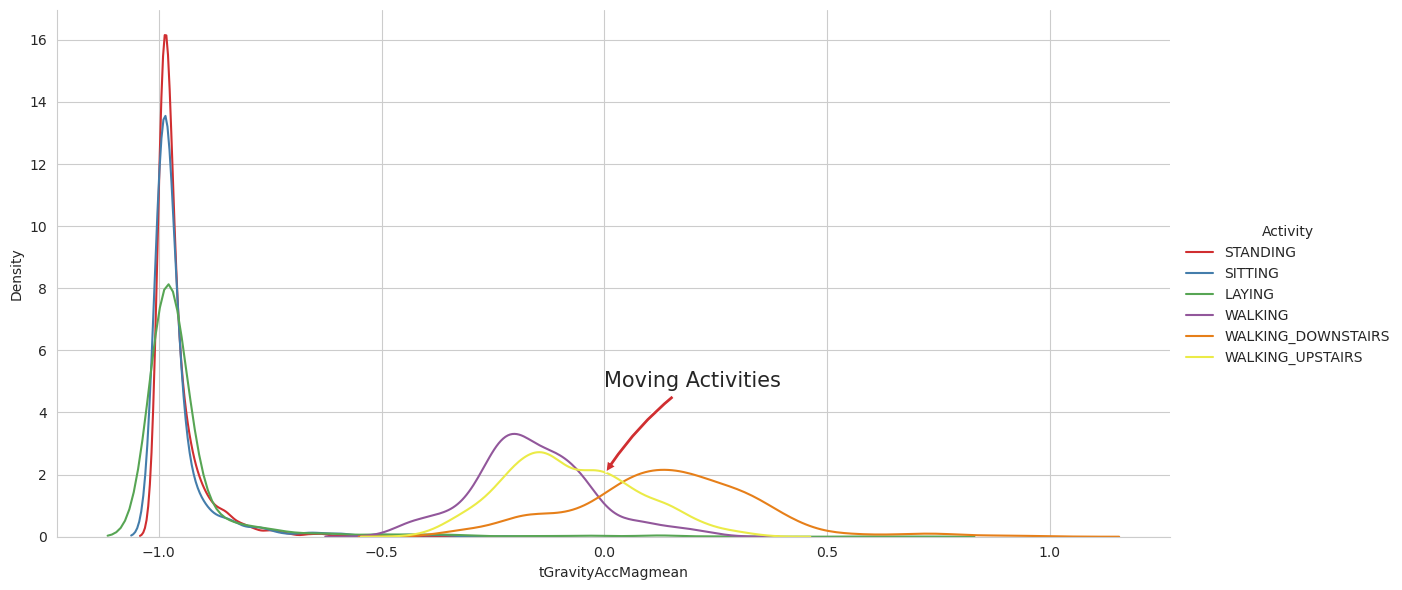

In [30]:
sns.set_palette("Set1", desat=0.8)
facetgrid = sns.FacetGrid(df,hue='Activity',size = 6, aspect=2)
facetgrid.map(sns.distplot,'tGravityAccMagmean',hist = False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy = (0.0,2), xytext = (0.0,5),size = 15, va = 'center',ha='left', \
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

<AxesSubplot:title={'center':'tBodyAccJerkMagmean for Moving Activities'}, xlabel='tBodyAccJerkMagmean', ylabel='Density'>

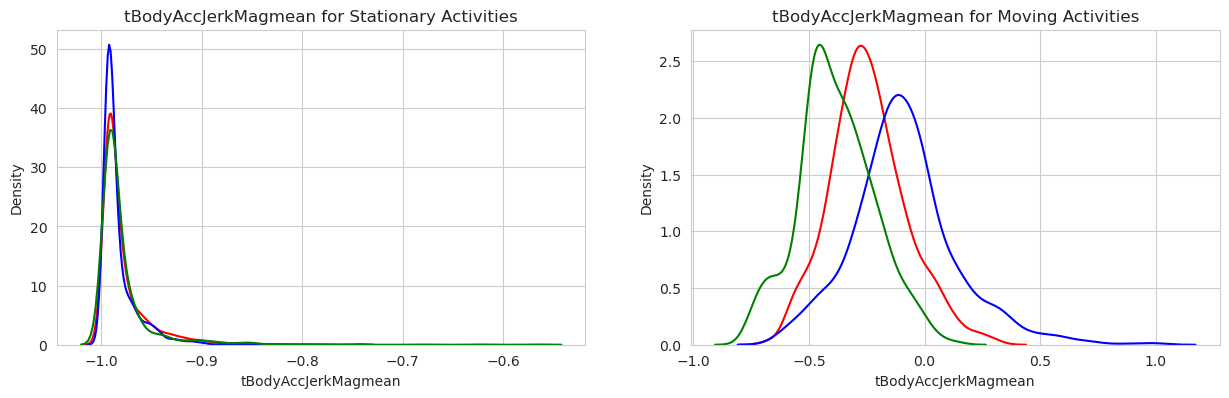

In [31]:
df1 = df[df['Activity'] == 'STANDING']
df2 = df[df['Activity'] == 'SITTING']
df3 = df[df['Activity'] == 'LAYING']
df4 = df[df['Activity'] == 'WALKING']
df5 = df[df['Activity'] == 'WALKING_DOWNSTAIRS']
df6 = df[df['Activity'] == 'WALKING_UPSTAIRS']

plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.title('tBodyAccJerkMagmean for Stationary Activities')
sns.distplot(df1['tBodyAccJerkMagmean'],color='r',hist=False,label="Standing")
sns.distplot(df2['tBodyAccJerkMagmean'],color='b',hist=False,label="Sitting")
sns.distplot(df3['tBodyAccJerkMagmean'],color='g',hist=False,label="Laying")

plt.subplot(2,2,2)
plt.title('tBodyAccJerkMagmean for Moving Activities')
sns.distplot(df4['tBodyAccJerkMagmean'],color='r',hist=False,label="Walking")
sns.distplot(df5['tBodyAccJerkMagmean'],color='b',hist=False,label="Walking_downstairs")
sns.distplot(df6['tBodyAccJerkMagmean'],color='g',hist=False,label="Walking_upstairs")

C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vishwanath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

<AxesSubplot:title={'center':'tBodyAccMagmean for Moving Activities'}, xlabel='tBodyAccMagmean', ylabel='Density'>

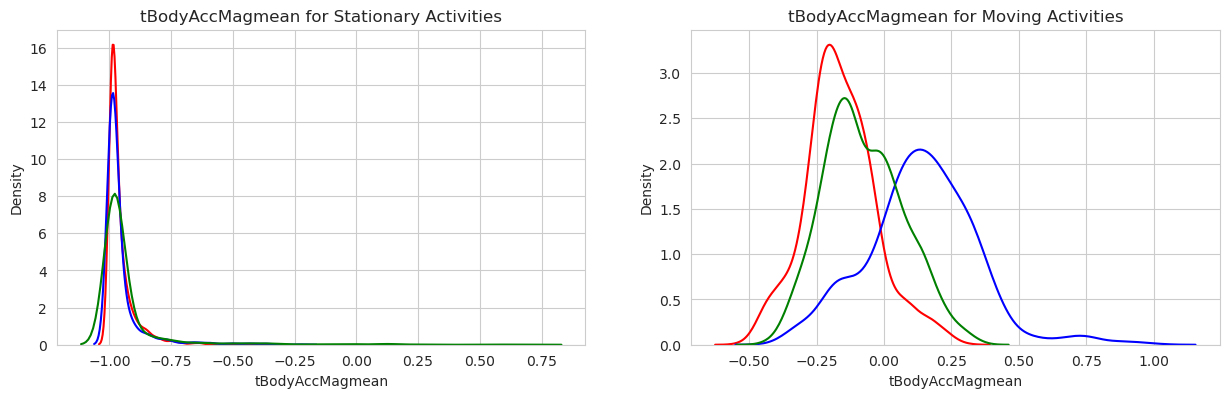

In [32]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.title('tBodyAccMagmean for Stationary Activities')
sns.distplot(df1['tBodyAccMagmean'],color='r',hist=False,label="Standing")
sns.distplot(df2['tBodyAccMagmean'],color='b',hist=False,label="Sitting")
sns.distplot(df3['tBodyAccMagmean'],color='g',hist=False,label="Laying")

plt.subplot(2,2,2)
plt.title('tBodyAccMagmean for Moving Activities')
sns.distplot(df4['tBodyAccMagmean'],color='r',hist=False,label="Walking")
sns.distplot(df5['tBodyAccMagmean'],color='b',hist=False,label="Walking_downstairs")
sns.distplot(df6['tBodyAccMagmean'],color='g',hist=False,label="Walking_upstairs")

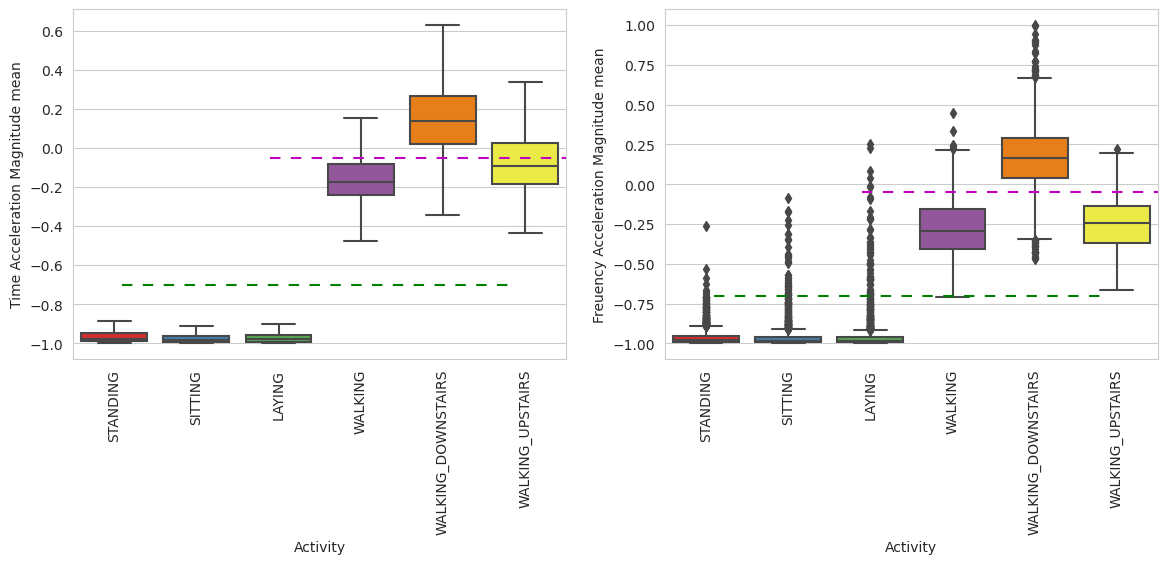

In [33]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=df, showfliers=False, saturation=1)
plt.ylabel('Time Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.boxplot(x='Activity', y='fBodyAccMagmean',data=df,showfliers=True,saturation=1)
plt.ylabel('Freuency Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

Observations in time domain

If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
If tAccMean > 0.0 then the Activity is WalkingDownstairs.
We can classify 75% the Acitivity labels with some errors.
Observations in Frequency domain

If fBodyAccMagmean is < -0.75 then the Activities are either Standing or Sitting or Laying.
If fBodyAccMagmean is > -0.5 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
If fBodyAccMagmean > 0.0 then the Activity is WalkingDownstairs.
We can classify 75% the Acitivity labels with some errors.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

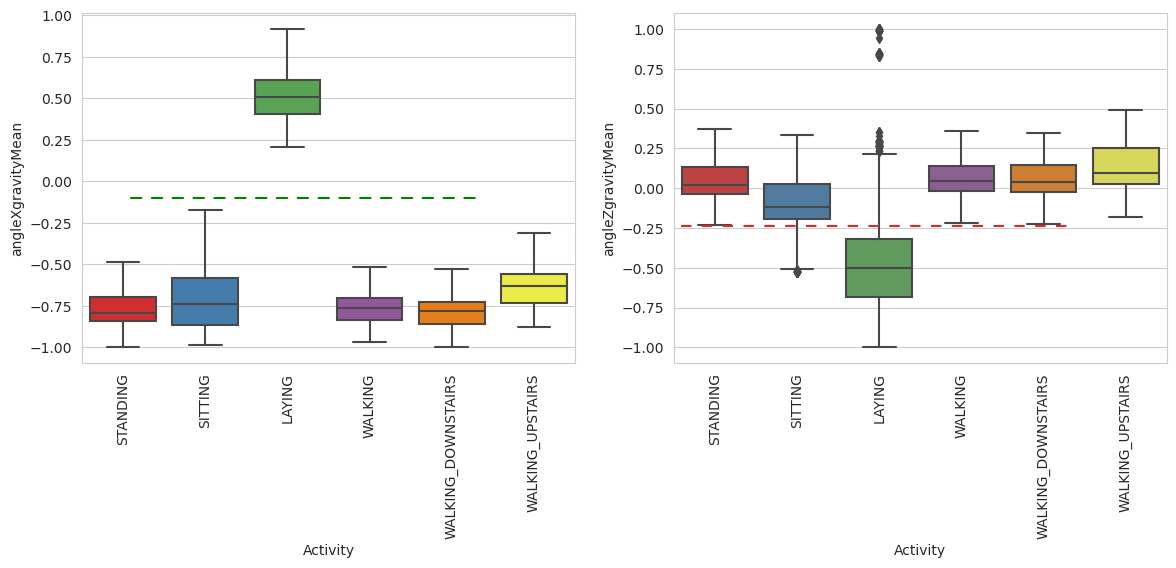

In [34]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Activity', y= 'angleXgravityMean',data = df,showfliers=False, saturation=1)
plt.axhline(y=-0.1, xmin = 0.1, xmax= 0.8, dashes=(5,5), c='g',animated = True,dash_capstyle = 'round')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.boxplot(x='Activity', y= 'angleZgravityMean', data = df)
plt.axhline(y=-0.24, xmin=-1, xmax = 0.8, dashes = (5,5))
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

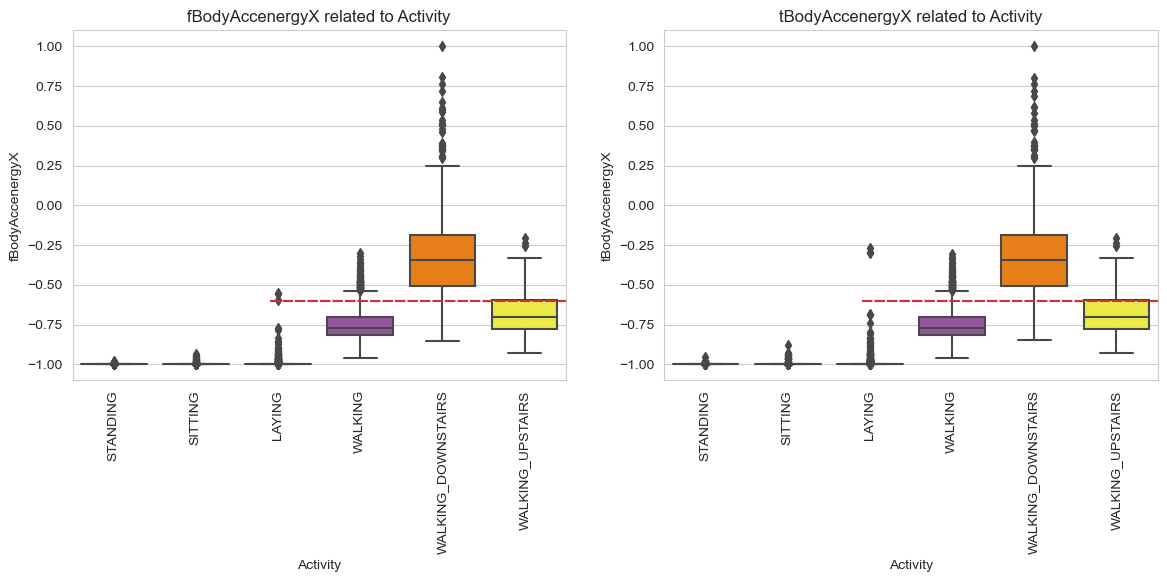

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Activity', y='fBodyAccenergyX', data=df, saturation = 1)
plt.axhline(y= -0.6, xmin = 0.4, xmax = 1.0, dashes = (5,1))
plt.title('fBodyAccenergyX related to Activity')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.boxplot(x = 'Activity', y='tBodyAccenergyX', data=df, saturation = 1)
plt.axhline(y= -0.6, xmin = 0.4, xmax = 1.0, dashes = (5,1))
plt.title('tBodyAccenergyX related to Activity')
plt.xticks(rotation = 90)

Obserbations

All features are some how differentiate w.r.t. moving activities and stationary activities
Body acceleration along X axis w.r.t. Time domain and Frequency domain features helps to conclude walking downstairs activity is differentiable w.r.t. moving activities
Somehow all the features looks important here. If any specific feature may not clearly differntiate all activities other features may differentiate.
TO get more clarifications perform dimensionality reduction

Principal Component Analysis (PCA)
t-SNE

# PCA

In [36]:
from sklearn.decomposition import PCA

In [37]:
%time
pca = PCA(n_components=2)
components = pca.fit_transform(X)
components.shape

Wall time: 0 ns


(14704, 2)

In [38]:
componentsDataFrame = pd.DataFrame(components,columns=['component1', 'component2'])

Text(0.5, 1.0, '2D Visualization of data using PCA')

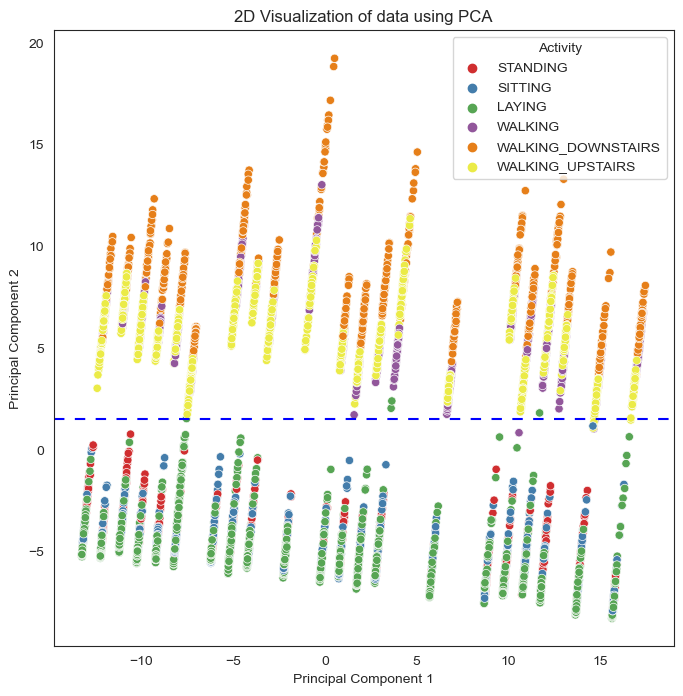

In [39]:
sns.set_style('white')
plt.figure(figsize=(8,8))
sns.scatterplot(x= 'component1', y = 'component2', hue=y, data=componentsDataFrame)
plt.axhline(y=1.5, xmin = 0, xmax = 1, dashes = (5,5), c = 'b')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of data using PCA')

Observations

2D visualization of data using PCA shows that there is significant difference between moving and stationary activities
PCA based visualization cannot differentiate stationary activities
PCA based visualization cannot differentiate moving activities

# t-SNE

In [40]:
from sklearn.manifold import TSNE

In [41]:
%%time
tsne = TSNE(n_components = 2)
tsneComponents = tsne.fit_transform(X)
tsne = TSNE(learning_rate=200.0) # set the learning_rate parameter explicitly
import os 
os.environ['PYTHONWARNINGS'] = "ignore:default_value_for_learning_rate:FutureWarning"

C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Wall time: 1min 4s


In [42]:
tsneComponents.shape

(14704, 2)

In [43]:
tsneDataFrame = pd.DataFrame(tsneComponents, columns = ['tsneComponent1','tsneComponent2'])

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 14704 samples in 0.015s...


C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14704 samples in 6.123s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probabilities for sample 12000 / 14704
[t-SNE] Computed conditional probabilities for sample 13000 / 14704
[t-SNE] Computed conditional probabilities for sample 14000 / 14704

C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14704 samples in 5.869s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probabilities for sample 12000 / 14704
[t-SNE] Computed conditional probabilities for sample 13000 / 14704
[t-SNE] Computed conditional probabilities for sample 14000 / 14704

C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14704 samples in 5.833s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probabilities for sample 12000 / 14704
[t-SNE] Computed conditional probabilities for sample 13000 / 14704
[t-SNE] Computed conditional probabilities for sample 14000 / 14704

C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14704 samples in 5.937s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probabilities for sample 12000 / 14704
[t-SNE] Computed conditional probabilities for sample 13000 / 14704
[t-SNE] Computed conditional probabilities for sample 14000 / 14704

C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14704 samples in 5.779s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probabilities for sample 12000 / 14704
[t-SNE] Computed conditional probabilities for sample 13000 / 14704
[t-SNE] Computed conditional probabilities for sample 14000 / 14704

C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14704 samples in 5.951s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probabilities for sample 12000 / 14704
[t-SNE] Computed conditional probabilities for sample 13000 / 14704
[t-SNE] Computed conditional probabilities for sample 14000 / 14704

C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14704 samples in 5.959s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probabilities for sample 12000 / 14704
[t-SNE] Computed conditional probabilities for sample 13000 / 14704
[t-SNE] Computed conditional probabilities for sample 14000 / 14704

C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14704 samples in 5.967s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probabilities for sample 12000 / 14704
[t-SNE] Computed conditional probabilities for sample 13000 / 14704
[t-SNE] Computed conditional probabilities for sample 14000 / 14704

C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14704 samples in 6.035s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probabilities for sample 12000 / 14704
[t-SNE] Computed conditional probabilities for sample 13000 / 14704
[t-SNE] Computed conditional probabilities for sample 14000 / 14704

C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 14704 samples in 6.568s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14704
[t-SNE] Computed conditional probabilities for sample 2000 / 14704
[t-SNE] Computed conditional probabilities for sample 3000 / 14704
[t-SNE] Computed conditional probabilities for sample 4000 / 14704
[t-SNE] Computed conditional probabilities for sample 5000 / 14704
[t-SNE] Computed conditional probabilities for sample 6000 / 14704
[t-SNE] Computed conditional probabilities for sample 7000 / 14704
[t-SNE] Computed conditional probabilities for sample 8000 / 14704
[t-SNE] Computed conditional probabilities for sample 9000 / 14704
[t-SNE] Computed conditional probabilities for sample 10000 / 14704
[t-SNE] Computed conditional probabilities for sample 11000 / 14704
[t-SNE] Computed conditional probabilities for sample 12000 / 14704
[t-SNE] Computed conditional probabilities for sample 13000 / 14704
[t-SNE] Computed conditional probabilities for sample 14000 / 14704

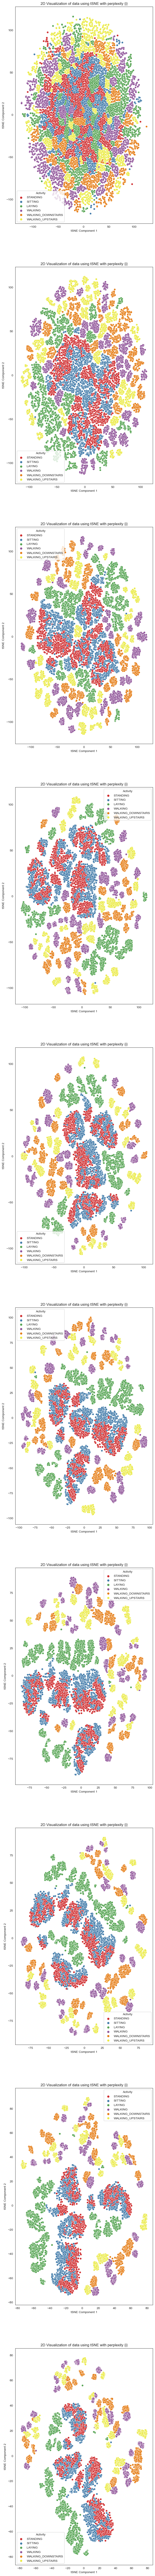

In [44]:
%%time
perplexities =[2,5,10,20,30,40,50,60,80,100]
sns.set_style('white')
plt.figure(figsize=(8,150))
for i, p in enumerate(perplexities):
  tsne = TSNE(n_components = 2, perplexity=p,verbose=1)
  tsneComponents = tsne.fit_transform(X)
  tsneDataFrame = pd.DataFrame(tsneComponents, columns = ['tsneComponent1','tsneComponent2'])
  plt.subplot(10,1,i+1)
  sns.scatterplot(x= 'tsneComponent1', y = 'tsneComponent2', hue=y, data=tsneDataFrame)
  plt.xlabel('tSNE Component 1')
  plt.ylabel('tSNE Component 2')
  plt.title('2D Visualization of data using tSNE with perplexity {i}')

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [46]:
X = df.drop('Activity',inplace=False, axis = 1)
y = df['Activity']

In [47]:
y = y.map({'STANDING': 0, 'SITTING': 1, 'LAYING': 2, 'WALKING':3,'WALKING_DOWNSTAIRS':4, 'WALKING_UPSTAIRS':5})

In [48]:
y.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [49]:
print("shape of y: ",y.shape)
print("shape of X: ",X.shape)

shape of y:  (7352,)
shape of X:  (7352, 562)


# Split data into Train, Test, Cross Validation

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X1,X_test,y1,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X1,y1,test_size = 0.2, random_state = 10)

In [52]:
print("Number of data points in Train", X_train.shape)
print("Number of data points in Test", X_test.shape)
print("Number of data points in CV", X_cv.shape)

Number of data points in Train (4704, 562)
Number of data points in Test (1471, 562)
Number of data points in CV (1177, 562)


In [53]:
print("Number of data points in Train", y_train.shape)
print("Number of data points in Test", y_test.shape)
print("Number of data points in CV", y_cv.shape)

Number of data points in Train (4704,)
Number of data points in Test (1471,)
Number of data points in CV (1177,)


# Base model - RandomModel
To compare the performance we will use a random Model as a benchmark
y_pred as random values between 0 - 5

In [54]:
import numpy as np

In [55]:
np.random.seed(10)
y_pred = np.random.randint(low=0, high=6, size=(X_test.shape[0],))
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5])

In [56]:
y_pred

array([1, 5, 4, ..., 0, 0, 1])

In [57]:
def printPerformace(actual, prediction, string):
  cf = confusion_matrix(actual,prediction)
  plt.figure(figsize=(14,9))
  plt.subplot(2,2,1)
  sns.heatmap(cf,fmt= ".2g", annot=True,xticklabels = True, yticklabels = True)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title("Confusion Matrix for " + string)
  
  plt.subplot(2,2,2)
  colSum = np.sum(cf, axis = 0)
  colSum = colSum.reshape(-1,1)
  PrecisionMatrix = cf/colSum
  sns.heatmap(PrecisionMatrix,fmt= ".2g", annot=True,xticklabels = True, yticklabels = True)  
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title("Precision Matrix for " + string)

  plt.subplot(2,2,3)
  rowSum = np.sum(cf, axis = 1)
  rowSum = rowSum.reshape(1,-1)
  RecallMatrix = cf/rowSum
  sns.heatmap(RecallMatrix,fmt= ".3g", annot=True,xticklabels = True, yticklabels = True)  
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title("Recall Matrix for " + string)

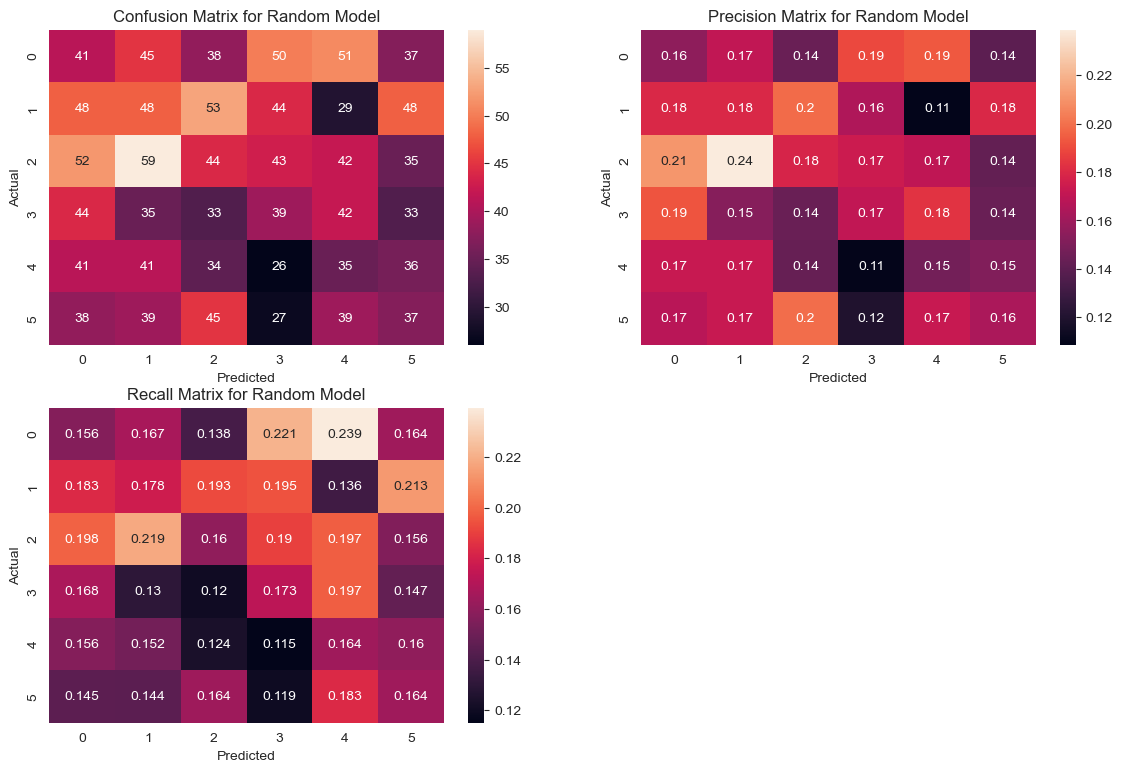

In [58]:
printPerformace(y_test, y_pred, "Random Model")

In [59]:
print("Classification report of Randmo Model")
print(classification_report(y_test, y_pred))
print("Accuracy of Random Model: ", accuracy_score(y_test, y_pred))

Classification report of Randmo Model
              precision    recall  f1-score   support

           0       0.16      0.16      0.16       262
           1       0.18      0.18      0.18       270
           2       0.18      0.16      0.17       275
           3       0.17      0.17      0.17       226
           4       0.15      0.16      0.16       213
           5       0.16      0.16      0.16       225

    accuracy                           0.17      1471
   macro avg       0.17      0.17      0.17      1471
weighted avg       0.17      0.17      0.17      1471

Accuracy of Random Model:  0.16587355540448676


# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm

In [61]:
%%time
lamda = [10**x for x in range(-4,4,1)]
accuracies = []
for l in tqdm(lamda):
  clfLR = LogisticRegression(penalty = 'l2', C = l, n_jobs=-1)
  clfLR.fit(X_train,y_train)
  y_predLR = clfLR.predict(X_cv)
  acc = accuracy_score(y_cv, y_predLR)
  accuracies.append(acc)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:39<00:00,  4.99s/it]

Wall time: 39.9 s


In [62]:
%%time
bestLamda = lamda[accuracies.index(max(accuracies))]
clfLR = LogisticRegression(penalty = 'l2', C = bestLamda, max_iter = 1000, solver = 'liblinear')
clfLR.fit(X_train,y_train)
y_predLR = clfLR.predict(X_test)
print("Final Accuracy: ", accuracy_score(y_test,y_predLR))

Final Accuracy:  0.9809653297076818
Wall time: 4.91 s


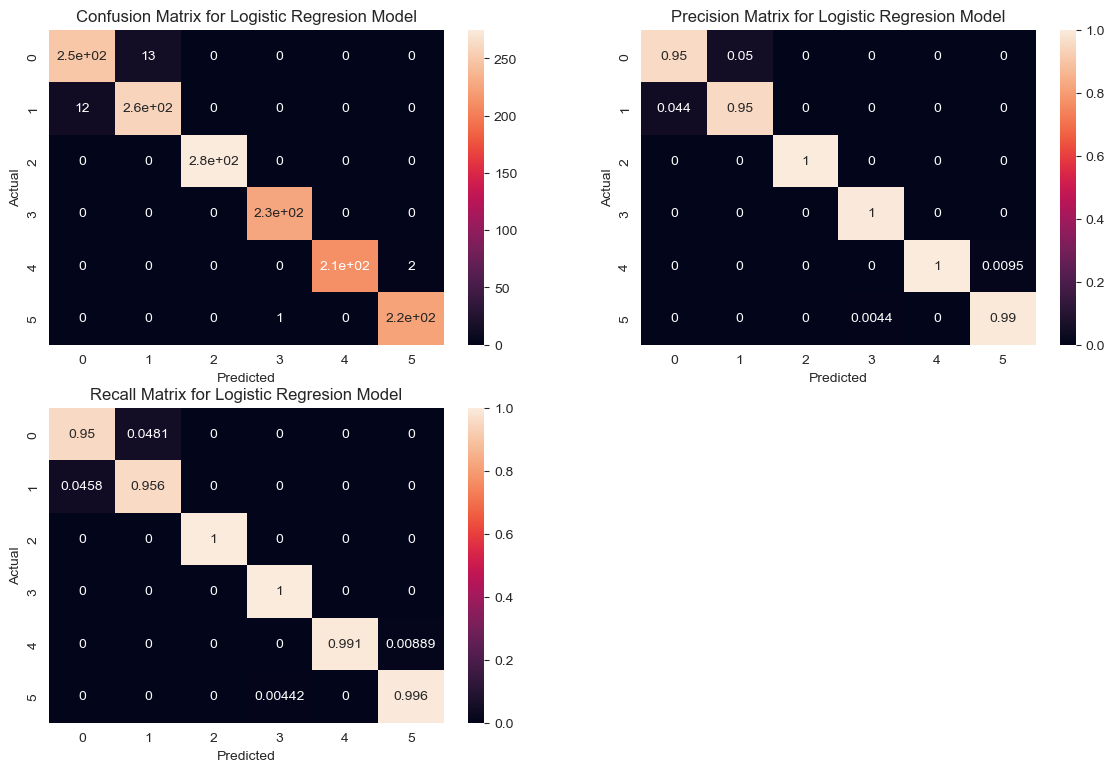

In [63]:
printPerformace(y_test, y_predLR, "Logistic Regresion Model")

In [64]:
print("Classification report of Logistic Regresion Model")
print(classification_report(y_test, y_predLR))
print("Accuracy of Logistic Regresion Model: ", accuracy_score(y_test, y_predLR))

Classification report of Logistic Regresion Model
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       262
           1       0.95      0.96      0.95       270
           2       1.00      1.00      1.00       275
           3       1.00      1.00      1.00       226
           4       1.00      0.99      1.00       213
           5       0.99      1.00      0.99       225

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471

Accuracy of Logistic Regresion Model:  0.9809653297076818


# SVM Classifier 

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [66]:
parameters = {
    'kernel': ['linear','rbf','poly'],
    'degree': [2,3],
    'C': [10**x for x in range(-3,3,1)],
    'gamma': [-0.01, -0.1, 0.0, 0.01, 0.1]
}

In [67]:
%%time
clfSVC = SVC()
GridSVC = GridSearchCV(clfSVC, param_grid=parameters, n_jobs=-1,verbose = 1)
GridSVC.fit(X1,y1)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\vishwanath\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sk

Wall time: 1h 59s


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [2, 3],
                         'gamma': [-0.01, -0.1, 0.0, 0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [68]:
bestSVC = GridSVC.best_estimator_
bestSVC.fit(X1,y1)
y_predSVC = bestSVC.predict(X_test)

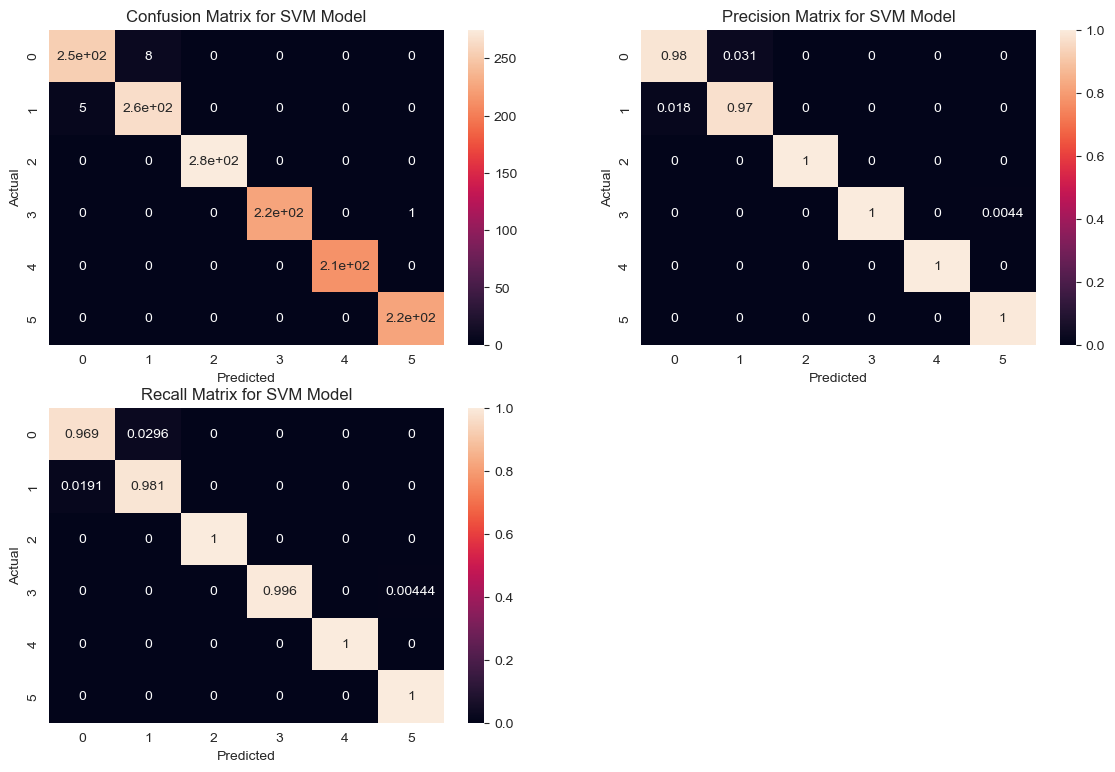

In [69]:
printPerformace(y_test, y_predSVC, "SVM Model")

In [70]:
print("Classification report of SVM Model")
print(classification_report(y_test, y_predSVC))
print("Accuracy of SVM Model: ", accuracy_score(y_test, y_predSVC))

Classification report of SVM Model
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       262
           1       0.97      0.98      0.98       270
           2       1.00      1.00      1.00       275
           3       1.00      1.00      1.00       226
           4       1.00      1.00      1.00       213
           5       1.00      1.00      1.00       225

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471

Accuracy of SVM Model:  0.990482664853841


In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
DTparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,5,7,9,10]
}

In [73]:
clfDT = DecisionTreeClassifier()
gridDT = GridSearchCV(clfDT,param_grid=DTparameters,verbose = 3, n_jobs = -1)
gridDT.fit(X1,y1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 7, 9, 10]},
             verbose=3)

In [74]:
bestDT = gridDT.best_estimator_
bestDT.fit(X1,y1)
y_predDT = bestDT.predict(X_test)

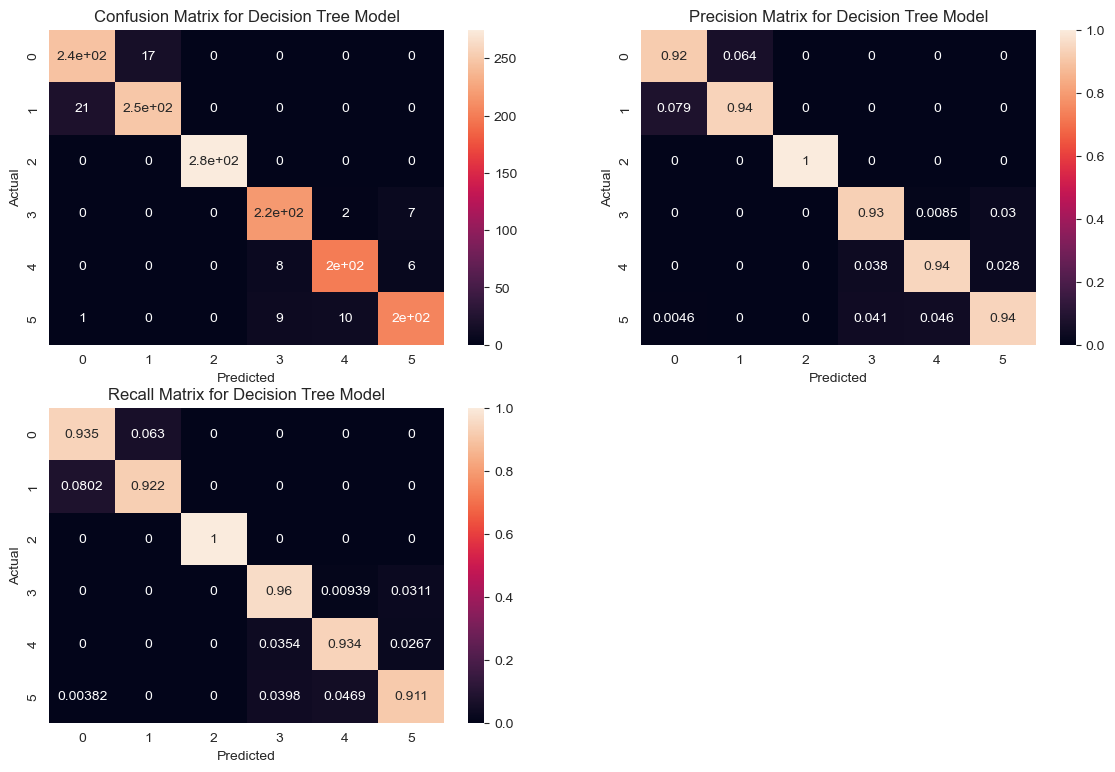

In [75]:
printPerformace(y_test, y_predDT, "Decision Tree Model")

In [76]:
print("Classification report of DT Model")
print(classification_report(y_test, y_predDT))
print("Accuracy of DT Model: ", accuracy_score(y_test, y_predDT))

Classification report of DT Model
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       262
           1       0.94      0.92      0.93       270
           2       1.00      1.00      1.00       275
           3       0.93      0.96      0.94       226
           4       0.94      0.93      0.94       213
           5       0.94      0.91      0.93       225

    accuracy                           0.94      1471
   macro avg       0.94      0.94      0.94      1471
weighted avg       0.95      0.94      0.94      1471

Accuracy of DT Model:  0.9449354180829368


# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
numIst = [10,50,100,120,150,180,200,300,500]
cvAccuracies = []
trainAccuracies = []
for estimators in tqdm(numIst):
  clfRF = RandomForestClassifier(n_estimators = estimators)
  clfRF.fit(X_train, y_train)
  y_predRFcv = clfRF.predict(X_cv)
  y_predRFTr = clfRF.predict(X_train)
  cvAcc = accuracy_score(y_cv,y_predRFcv)
  cvTr = accuracy_score(y_train,y_predRFTr)
  cvAccuracies.append(cvAcc)
  trainAccuracies.append(cvTr)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:21<00:00,  9.05s/it]


Text(0.5, 1.0, 'CV and Train error for Random Forest Classifier')

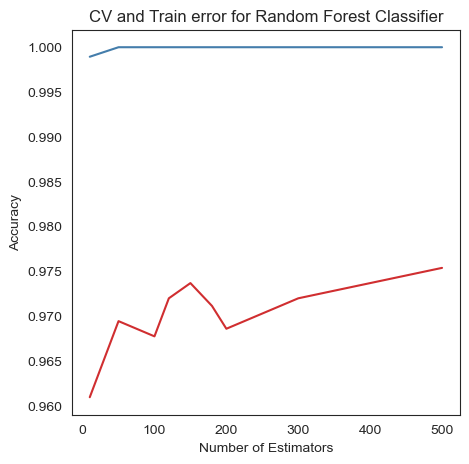

In [79]:
 plt.figure(figsize=(5,5))
plt.plot(numIst, cvAccuracies,numIst, trainAccuracies,)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("CV and Train error for Random Forest Classifier")

In [80]:
clfRF = RandomForestClassifier(n_estimators = 200)
clfRF.fit(X_train,y_train)
y_predRF = clfRF.predict(X_test)

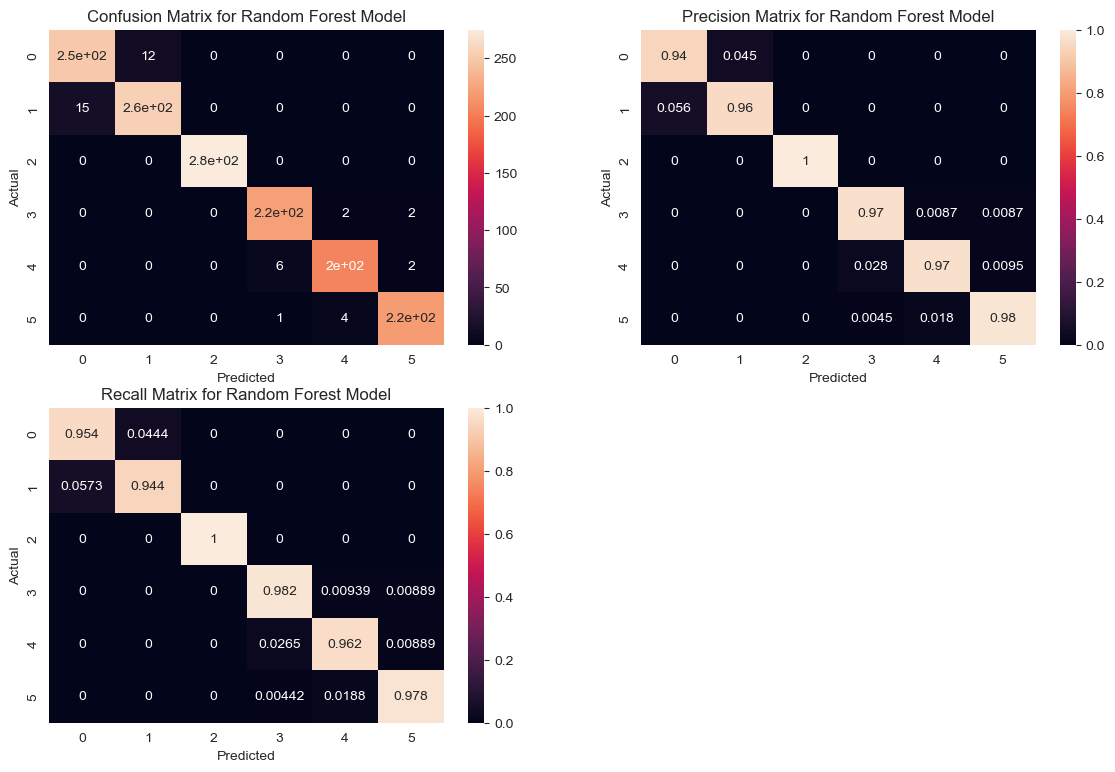

In [81]:
printPerformace(y_test, y_predRF, "Random Forest Model")

In [82]:
print("Classification report of Random Forest Model")
print(classification_report(y_test, y_predRF))
print("Accuracy of Random Forest Model: ", accuracy_score(y_test, y_predRF))

Classification report of Random Forest Model
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       262
           1       0.96      0.94      0.95       270
           2       1.00      1.00      1.00       275
           3       0.97      0.98      0.98       226
           4       0.97      0.96      0.97       213
           5       0.98      0.98      0.98       225

    accuracy                           0.97      1471
   macro avg       0.97      0.97      0.97      1471
weighted avg       0.97      0.97      0.97      1471

Accuracy of Random Forest Model:  0.9700883752549286


# XGBOOST

In [85]:
!pip install xgboost

In [87]:
!pip install --upgrade xgboost

In [88]:
from xgboost import XGBClassifier

In [89]:
clfXG = XGBClassifier()
clfXG.fit(X_train, y_train)
y_predXG = clfXG.predict(X_test)

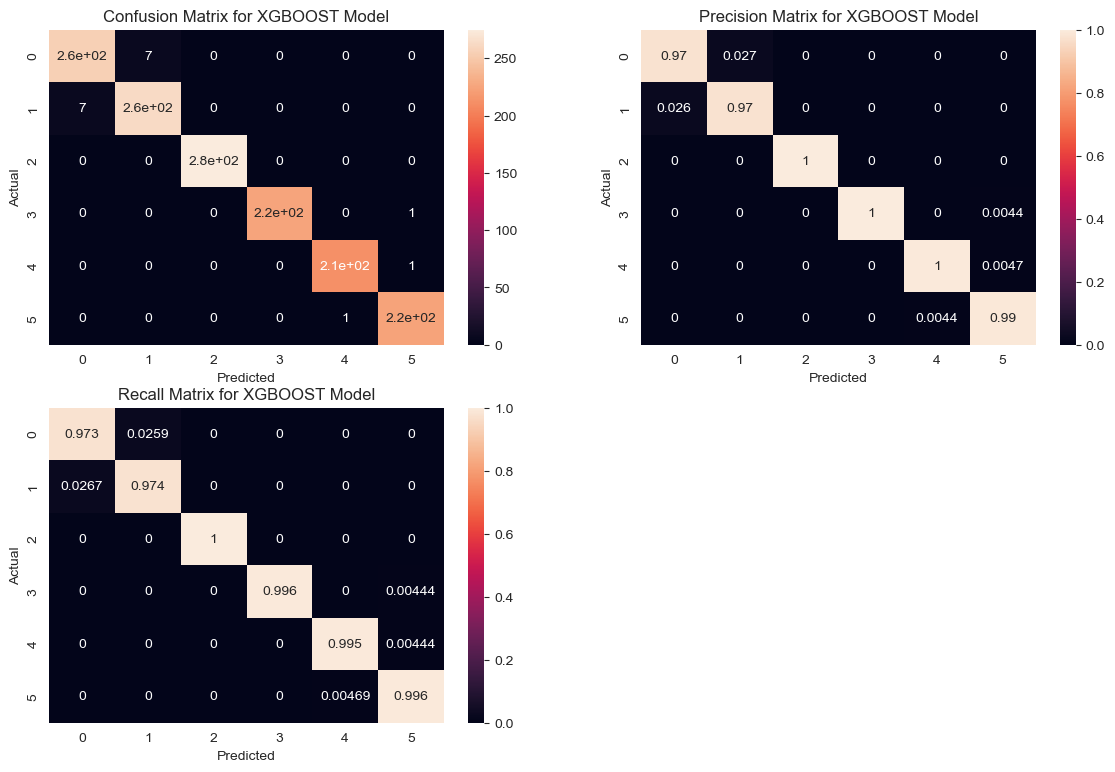

In [90]:
printPerformace(y_test, y_predXG, "XGBOOST Model")

In [91]:
print("Classification report of XGBOOST Model")
print(classification_report(y_test, y_predXG))
print("Accuracy of XGBOOST Model: ", accuracy_score(y_test, y_predXG))

Classification report of XGBOOST Model
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       262
           1       0.97      0.97      0.97       270
           2       1.00      1.00      1.00       275
           3       1.00      1.00      1.00       226
           4       1.00      1.00      1.00       213
           5       0.99      1.00      0.99       225

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471

Accuracy of XGBOOST Model:  0.9884432358939497


# Final Accuracies
    Model              Accuracy         Precision
Random Model             98.88            99
Logistic Regression      9          97
SVM Classifier           99.04            98
Decision Tree            95.49            95
Random Forest            97.00            97
XGBOOST                  98.88            99